![](https://raw.githubusercontent.com/cengineer13/modern_computer_vision/main/LOGO.png)

# **Blur Detection - Finding In-focus Images**

In this lesson we'll learn to use the Laplacian variance to find which image is the sharpest or most in-focus.



### **To Detect Blur, we simply Convolve with the Laplacian kernel.**

We take the grayscale of an image can then convolve it with the Laplacian kernel (3 x 3 kernel):

To quantify blur, we then take the variance of the response output.

The Laplacian is the 2nd derivative of an image and thus it highlights the areas of an image containing rapid intensity changes. Hence it's use in Edge Detection. 

A high variance should in theory, indicate the presence of both edge-like and non-edge like (hence the wide range of values resulting in a high variance), which is typical of a normal in-focus image. 

A low variance, thus might mean very little edges in the image meaning it might be blurred as the more blur present the less edges there are.

In [2]:
import cv2
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

#### **Produce some Blurred Images**

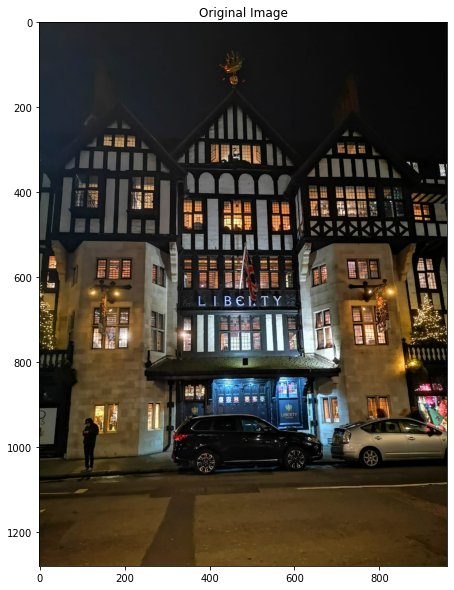

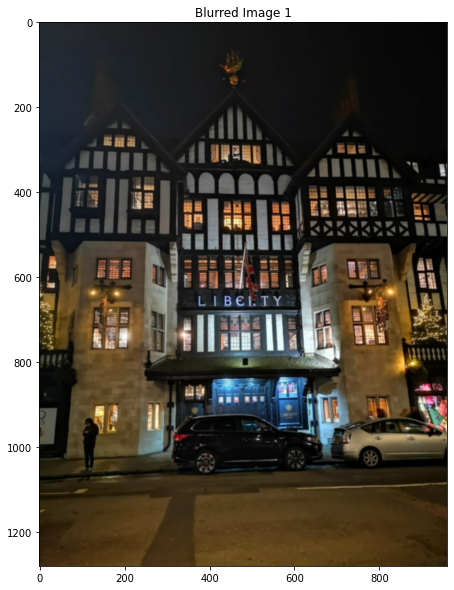

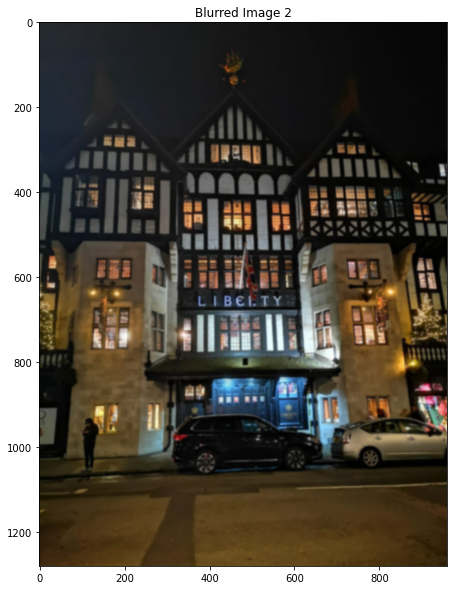

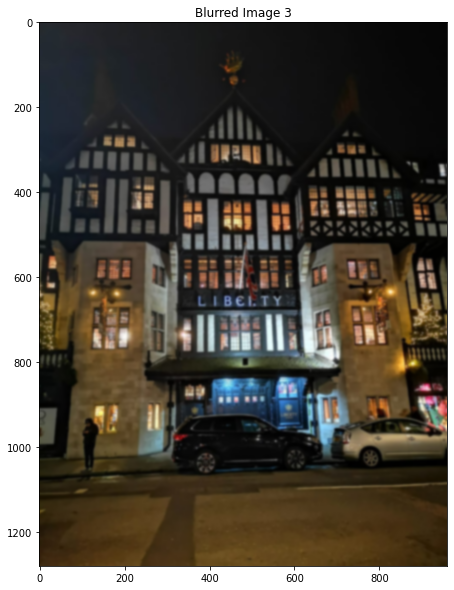

In [3]:
# Load our input image
image = cv2.imread('Datasets//images/liberty.jpeg')
imshow("Original Image", image)

blur_1 = cv2.GaussianBlur(image, (5,5), 0)
imshow('Blurred Image 1', blur_1) 

blur_2 = cv2.GaussianBlur(image, (9,9), 0)
imshow('Blurred Image 2', blur_2) 

blur_3 = cv2.GaussianBlur(image, (13,13), 0)
imshow('Blurred Image 3', blur_3) 

In [6]:
def getBlurScore(image):
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        imshow('laplacian image', image)
    return cv2.Laplacian(image, cv2.CV_64F).var()

#### **Show our scores, higher means less blur!**

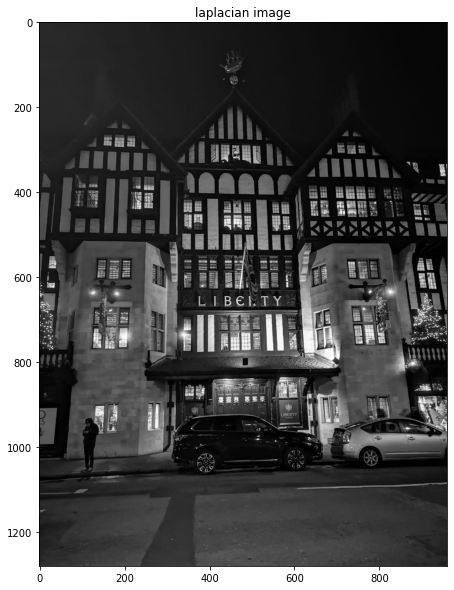

Blur Score = 894.1643803618214


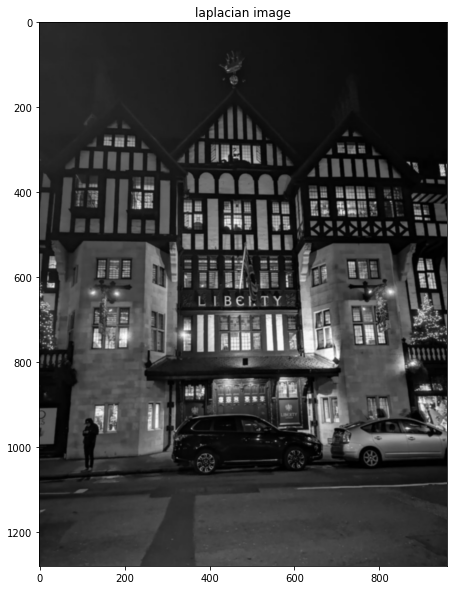

Blur Score = 64.20102699531715


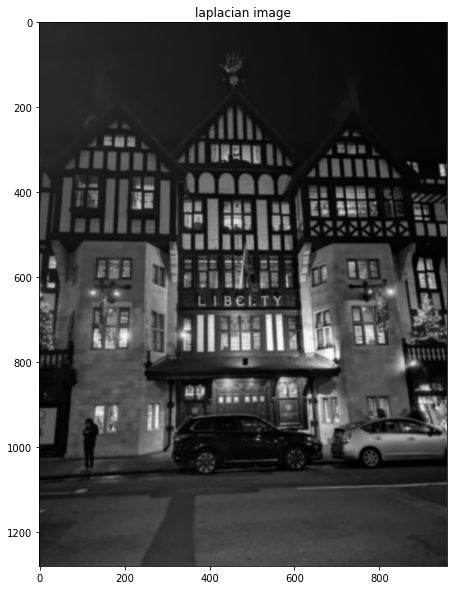

Blur Score = 14.90084552899931


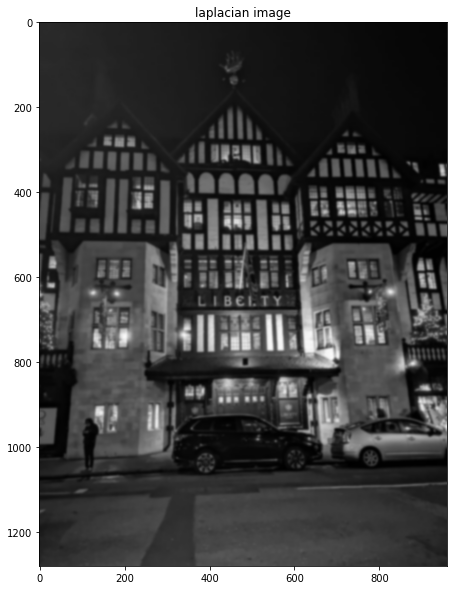

Blur Score = 6.293340649969713


In [7]:
print("Blur Score = {}".format(getBlurScore(image)))
print("Blur Score = {}".format(getBlurScore(blur_1)))
print("Blur Score = {}".format(getBlurScore(blur_2)))
print("Blur Score = {}".format(getBlurScore(blur_3)))